# Introduction

The [Heart Disease Data Set](https://archive.ics.uci.edu/dataset/45/heart+disease) from the UCI Machine Learning Repository. This dataset comes from the famous Cleveland Clinic Foundation, which recorded information on various patient characteristics, including age and chest pain, to try to classify the presence of heart disease in an individual.

In this project, we will Classify Heart Diseases with a **Logistic Regression**

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Loading the data
heart = pd.read_csv('heart_disease.csv')


## Exploring

Before we build any model, we should explore the dataset and perform any adjustments we might need before actually fitting the model.

In [107]:
heart.head(3)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1


In [108]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


* `ca` and `thal` need to be converted to float. As they don't look so important, I will drop then out.
* We don't have null values.
* We will drop `Unnamed`

**Column Names to Understand**

* The column `present` defines if the person has a heart disease. If '=1' it means a heart disease is present.
* `cp`: (chest pain type)
        (-- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic)

* `fbs`: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
* `restcg`: (resting electrocardiographic results) (0 = normal; 1 = having abnormality; 2 = showing left ventricular hypertrophy)
* `exang`: exercise induced angina (1 = yes; 0 = no)
* `slope`:(slope: the slope of the peak exercise ST segment)
        (-- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping)

### Choosing Features and Data Cleaning

In [109]:
# Dropping `ca` and `thal`
heart = heart.drop(['ca', 'thal', 'Unnamed: 0'], axis=1)

Below, I plot some graphs just have an idea of the distirbution of the data.

C:\Users\victo\AppData\Local\Temp\ipykernel_16896\4099394916.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_xticklabels(['Woman','Man'])
C:\Users\victo\AppData\Local\Temp\ipykernel_16896\4099394916.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,2].set_xticklabels(['Typical','Atypical','Non-anginal','asymptomatic'])
C:\Users\victo\AppData\Local\Temp\ipykernel_16896\4099394916.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,2].set_xticklabels(['< 120 mg/dl','> 120 mg/dl'])
C:\Users\victo\AppData\Local\Temp\ipykernel_16896\4099394916.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2,0].set_xticklabels(['Normal','

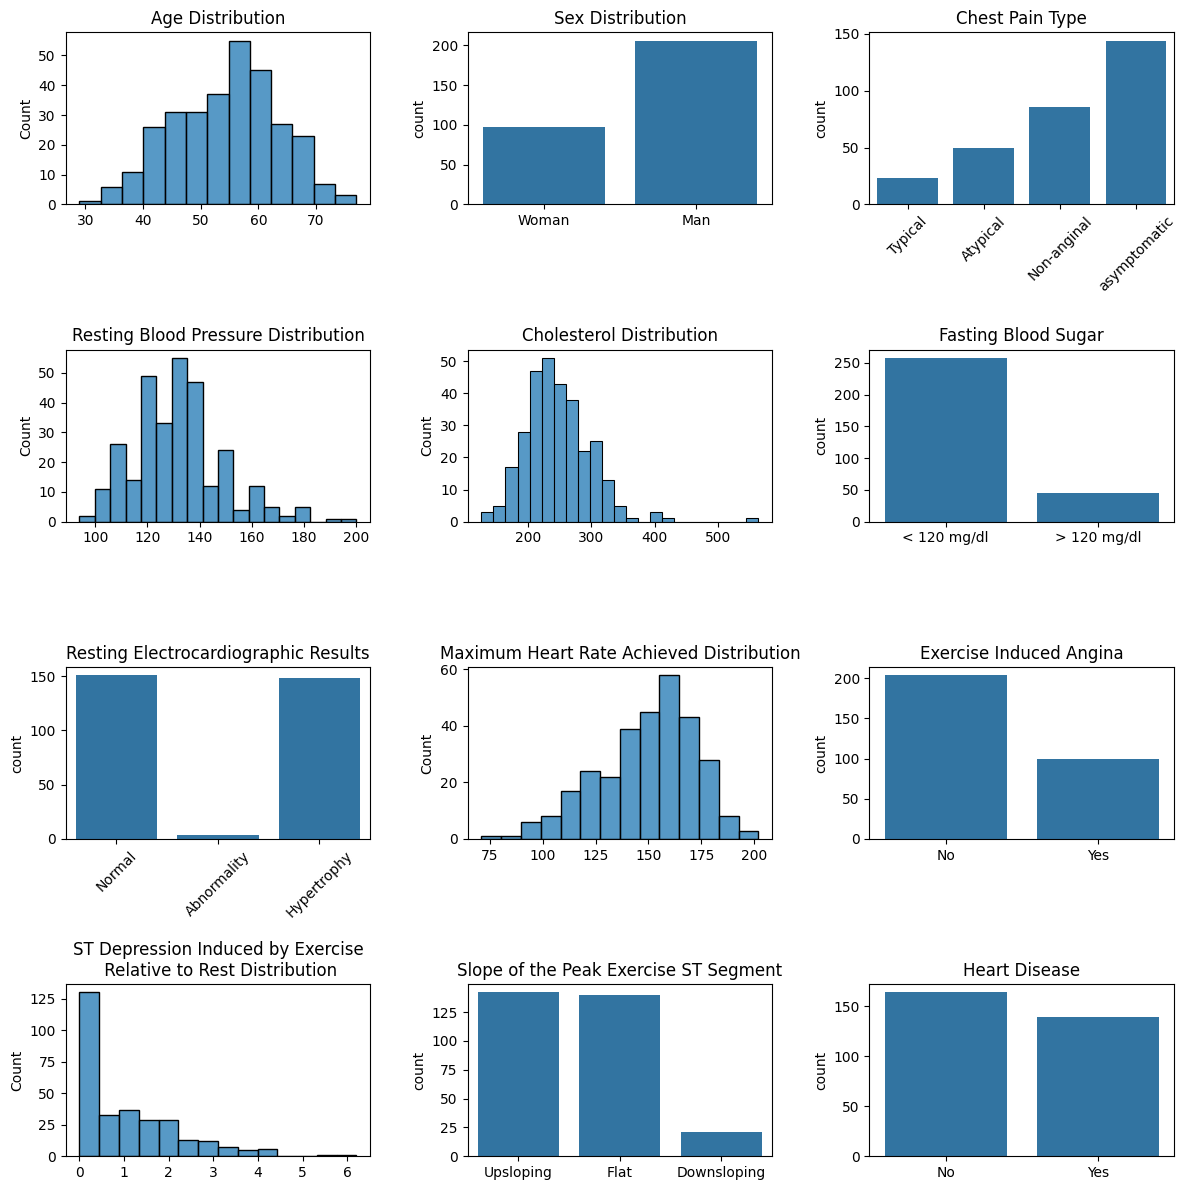

In [110]:
figure, ax = plt.subplots(4,3, figsize=(12,12))

# Age
sns.histplot(heart['age'], ax=ax[0,0])
ax[0,0].set_title('Age Distribution')
ax[0,0].set_xlabel('')

# Sex
sns.countplot( data= heart, x = 'sex', ax=ax[0,1])
ax[0,1].set_title('Sex Distribution')
ax[0,1].set_xticklabels(['Woman','Man'])
ax[0,1].set_xlabel('')

# Chest Pain Type
sns.countplot( data= heart, x = 'cp', ax=ax[0,2])
ax[0,2].set_title('Chest Pain Type')
ax[0,2].set_xticklabels(['Typical','Atypical','Non-anginal','asymptomatic'])
ax[0,2].xaxis.set_tick_params(rotation=45)
ax[0,2].set_xlabel('')

# Resting Blood Pressure
sns.histplot(heart['trestbps'], ax=ax[1,0])
ax[1,0].set_title('Resting Blood Pressure Distribution')
ax[1,0].set_xlabel('')

# Cholesterol
sns.histplot(heart['chol'], ax=ax[1,1])
ax[1,1].set_title('Cholesterol Distribution')
ax[1,1].set_xlabel('')

# Fasting Blood Sugar
sns.countplot( data= heart, x = 'fbs', ax=ax[1,2])
ax[1,2].set_title('Fasting Blood Sugar')
ax[1,2].set_xticklabels(['< 120 mg/dl','> 120 mg/dl'])
ax[1,2].set_xlabel('')

# Resting Electrocardiographic Results - restecg
sns.countplot( data= heart, x = 'restecg', ax=ax[2,0])
ax[2,0].set_title('Resting Electrocardiographic Results')
ax[2,0].set_xticklabels(['Normal','Abnormality','Hypertrophy'])
ax[2,0].xaxis.set_tick_params(rotation=45)
ax[2,0].set_xlabel('')

# Maximum Heart Rate Achieved - thalach
sns.histplot(heart['thalach'], ax=ax[2,1])
ax[2,1].set_title('Maximum Heart Rate Achieved Distribution')
ax[2,1].set_xlabel('')

# Exercise Induced Angina - exang
sns.countplot( data= heart, x = 'exang', ax=ax[2,2])
ax[2,2].set_title('Exercise Induced Angina')
ax[2,2].set_xticklabels(['No','Yes'])
ax[2,2].set_xlabel('')

# ST Depression Induced by Exercise Relative to Rest - oldpeak
sns.histplot(heart['oldpeak'], ax=ax[3,0])
ax[3,0].set_title('ST Depression Induced by Exercise\n Relative to Rest Distribution')
ax[3,0].set_xlabel('')

# Slope of the Peak Exercise ST Segment - slope
sns.countplot( data= heart, x = 'slope', ax=ax[3,1])
ax[3,1].set_title('Slope of the Peak Exercise ST Segment')
ax[3,1].set_xticklabels(['Upsloping','Flat','Downsloping'])
ax[3,1].set_xlabel('')

# Target - present
sns.countplot( data= heart, x = 'present', ax=ax[3,2])
ax[3,2].set_title('Heart Disease')
ax[3,2].set_xticklabels(['No','Yes'])
ax[3,2].set_xlabel('')

plt.tight_layout(h_pad=1.5, w_pad=3)

From the graphs below, it is possible to see we have a male majority, the average age from our dataset is around 55 years, most people in the dataset don't show a heart disease.

Below, I try to figure out some variables to be my features.


In [111]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [112]:
# Checking potential predictors
heart.groupby("present").agg(
    {
        "age": "mean",
        "sex": "mean",
        "cp": "mean",
        "trestbps": "mean",
        "chol": "mean",
        "fbs": "mean",
        "restecg": "mean",
        "thalach": "mean",
        "exang": "mean",
        "oldpeak": "mean",
        "slope": "mean"
    }
)
   

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
present,,,,,,,,,,,
0,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537
1,56.625899,0.820144,3.589928,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.827338


Some columns have a small, but noticeable difference when stratified by predictors. Based on the differences and some knowledge about heart disease, these seem like good candidates for predictors:

1. `age`
2. `sex`
3. `cp`
4. `restecg`
5. `oldpeak`

## Splitting the data for Model Training

As we just have 300 rows,I will set 70% of the dataset for training.

In [113]:
X = heart[['age','sex','cp','restecg','oldpeak']]
y = heart['present']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [114]:
# Check that both the training and test datasets have cases and non-cases
print(y_train.value_counts())
print('\n')
print(y_test.value_counts())

present
0    116
1     96
Name: count, dtype: int64


present
0    48
1    43
Name: count, dtype: int64


## Testing the model

**Some validations to remember**

What is the overall training accuracy? Sensitivity and specificity?
Does the model perform better on cases or non-cases? Or does it perform equally well?

In [115]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
accuracy = model.score(X_train, y_train)
print(f'The accuracy of the model on the training data is: {accuracy:.2f}')

The accuracy of the model on the training data is: 0.74


In [116]:
# Sensitivity and Specificity
y_pred = model.predict(X_train)
TP = sum((y_train == 1) & (y_pred == 1))
TN = sum((y_train == 0) & (y_pred == 0))
FP = sum((y_train == 0) & (y_pred == 1))
FN = sum((y_train == 1) & (y_pred == 0))
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f'The sensitivity of the model on the training data is: {sensitivity:.2f}')
print(f'The specificity of the model on the training data is: {specificity:.2f}')

The sensitivity of the model on the training data is: 0.70
The specificity of the model on the training data is: 0.78


The accuracy of our the model is 74%, which is not good finding out a disease.

The model is slightly better figuring out **negatives**. At least in traing data.

In [117]:
coefs = ['age','sex','cp','restecg','oldpeak']

# Checking in terms of log-odds
for coef, val  in zip(coefs, model.coef_[0]):
    print(coef, ":", round(val, 2))

print('\n')

# Checking in terms of odds
for coef, val  in zip(coefs, model.coef_[0]):
    print(coef, ":", round(np.exp(val), 2))

age : 0.07
sex : 1.64
cp : 0.78
restecg : 0.24
oldpeak : 0.59


age : 1.07
sex : 5.16
cp : 2.18
restecg : 1.27
oldpeak : 1.81


The 2 strongest coefficients are `sex` and `chest pain` holding other factors constant. Surprisingly, age is not associated with a high odd of heart disease. If you are a man, you have a really higher change to show a heart disease.

### Final Test

In [118]:
# testing on training data to see if the model is good at generalizing or its overfitted

accuracy2 = model.score(X_test, y_test)
print(f'The accuracy of the model on the testing data is: {accuracy2:.2f}')

The accuracy of the model on the testing data is: 0.75


In [119]:
# Sensitivity and Specificity on test data
y_pred1 = model.predict(X_test)
TP1 = sum((y_test == 1) & (y_pred1 == 1))
TN1 = sum((y_test == 0) & (y_pred1 == 0))
FP1 = sum((y_test == 0) & (y_pred1 == 1))
FN1 = sum((y_test == 1) & (y_pred1 == 0))
sensitivity1 = TP1 / (TP1 + FN1)
specificity1 = TN1 / (TN1 + FP1)

print(f'The sensitivity of the model on the testing data is: {sensitivity1:.2f}')
print(f'The specificity of the model on the testing data is: {specificity1:.2f}')

The sensitivity of the model on the testing data is: 0.72
The specificity of the model on the testing data is: 0.77


## Conclusion

Test accuracy was 75%, sensitivity was 72%, and specificity was 77%. Compared to the training set, the accuracy didn't change much and the model still fared better with non-cases and worse with cases. This is potentially bad since this application is health-based. We might be more interested in being better at identifying cases than non-cases.
